In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
data=pd.read_csv('Wekeza_data.csv')
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Wekeza Maisha Fund,6.658728e+09,8978247.54,741.6512,741.6512,726.8182,12/30/2022
1,Wekeza Maisha Fund,6.640438e+09,8957835.83,741.2993,741.2993,726.4733,12/29/2022
2,Wekeza Maisha Fund,6.631795e+09,8948322.05,741.1216,741.1216,726.2992,12/28/2022
3,Wekeza Maisha Fund,6.598530e+09,8905299.56,740.9666,740.9666,726.1473,12/27/2022
4,Wekeza Maisha Fund,6.583067e+09,8892450.96,740.2984,740.2984,725.4924,12/23/2022


In [112]:
data.shape

(1669, 7)

In [113]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Wekeza Maisha Fund,6.658728e+09,8978247.54,741.6512,741.6512,726.8182,12/30/2022
1,Wekeza Maisha Fund,6.640438e+09,8957835.83,741.2993,741.2993,726.4733,12/29/2022
2,Wekeza Maisha Fund,6.631795e+09,8948322.05,741.1216,741.1216,726.2992,12/28/2022
3,Wekeza Maisha Fund,6.598530e+09,8905299.56,740.9666,740.9666,726.1473,12/27/2022
4,Wekeza Maisha Fund,6.583067e+09,8892450.96,740.2984,740.2984,725.4924,12/23/2022


In [114]:
data['Net Asset Value'] = np.sqrt(data['Net Asset Value'])
data['Outstanding Number of Units'] = np.sqrt(data['Outstanding Number of Units'])

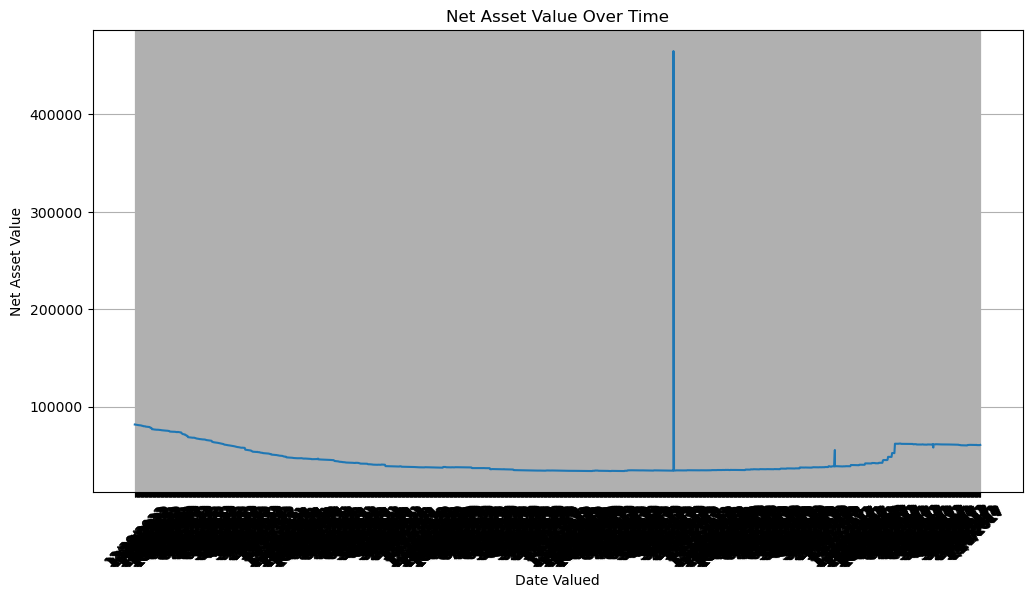

In [115]:
# Time series plot of NAV
plt.figure(figsize=(12, 6))
plt.plot(data['Date Valued'], data['Net Asset Value'])
plt.xlabel('Date Valued')
plt.ylabel('Net Asset Value')
plt.title('Net Asset Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [116]:
data.set_index('Date Valued', inplace=True)

In [117]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit
Date Valued,,,,,,
12/30/2022,Wekeza Maisha Fund,81601.029013,2996.372397,741.6512,741.6512,726.8182
12/29/2022,Wekeza Maisha Fund,81488.881027,2992.964388,741.2993,741.2993,726.4733
12/28/2022,Wekeza Maisha Fund,81435.834250,2991.374609,741.1216,741.1216,726.2992
12/27/2022,Wekeza Maisha Fund,81231.335961,2984.174854,740.9666,740.9666,726.1473
12/23/2022,Wekeza Maisha Fund,81136.101780,2982.021288,740.2984,740.2984,725.4924


In [118]:
df=data.filter(['Net Asset Value'])
dataset=df.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1336

In [119]:
df.head()

,Net Asset Value
Date Valued,
12/30/2022,81601.029013
12/29/2022,81488.881027
12/28/2022,81435.834250
12/27/2022,81231.335961
12/23/2022,81136.101780


In [120]:
## scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.1109032 ],
       [0.11064318],
       [0.11052019],
       ...,
       [0.06181217],
       [0.06180881],
       [0.06226015]])

In [121]:
#create the training set
#create the scaled training set
train_data=scaled_data[0:training_data_len, :]
print(train_data[:5])

[[0.1109032 ]
 [0.11064318]
 [0.11052019]
 [0.11004604]
 [0.10982524]]


In [122]:
#split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)

[array([0.1109032 , 0.11064318, 0.11052019, 0.11004604, 0.10982524,
       0.10974845, 0.10962621, 0.10926414, 0.10911212, 0.10901165,
       0.10897359, 0.10869054, 0.10801125, 0.10779488, 0.10762783,
       0.10679353, 0.10664405, 0.1066047 , 0.10660634, 0.10586738,
       0.10570385, 0.10537238, 0.10525716, 0.10505408, 0.10496208,
       0.10486301, 0.1048057 , 0.10325557, 0.10292106, 0.10271594,
       0.09973251, 0.0996807 , 0.09957185, 0.09921736, 0.09899495,
       0.09882359, 0.09863916, 0.09845437, 0.09833078, 0.09832346,
       0.09848259, 0.09827845, 0.09814604, 0.09784771, 0.09785233,
       0.09779631, 0.09740801, 0.09723785, 0.09706797, 0.09669015,
       0.09648814, 0.09645361, 0.09627416, 0.0961225 , 0.09630092,
       0.0962621 , 0.09615954, 0.09602566, 0.09573838, 0.09558915])]
[0.09546991139901516]


In [123]:
#convert the x_train and y_train into numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [124]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1276, 60, 1)

In [125]:
#buld LSTM model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [126]:
#complite the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [127]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1276/1276 [==============================] - 52s 37ms/step - loss: 9.7004e-04
Epoch 2/2
1276/1276 [==============================] - 54s 42ms/step - loss: 9.2760e-04


In [128]:
# #create the testing dataset
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [129]:
#convert the data to numpy array
x_test=np.array(x_test)

In [130]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(333, 60, 1)

In [131]:
#get the model prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

11/11 [==============================] - 1s 21ms/step


array([[40484.586],
       [40510.61 ],
       [40533.605],
       [40553.73 ],
       [40571.438],
       [40586.625],
       [40599.797],
       [40611.15 ],
       [40621.03 ],
       [40648.61 ],
       [40684.695],
       [40724.043],
       [40763.598],
       [40801.387],
       [40836.605],
       [40868.234],
       [40896.543],
       [40921.63 ],
       [40943.875],
       [40963.324],
       [40980.402],
       [40986.25 ],
       [40985.695],
       [40981.36 ],
       [40975.09 ],
       [40967.54 ],
       [40959.633],
       [40951.69 ],
       [40944.082],
       [40936.824],
       [40930.086],
       [40923.766],
       [40917.953],
       [40932.242],
       [40956.93 ],
       [40986.152],
       [41016.71 ],
       [41046.582],
       [41074.793],
       [41100.715],
       [41124.27 ],
       [41145.316],
       [41164.086],
       [41182.43 ],
       [41199.754],
       [41215.137],
       [41228.906],
       [41339.81 ],
       [41499.277],
       [41693.383],


In [132]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 6395058.064928546
R-squared (R2): 0.8847862236557426
Mean Absolute Error (MAE): 1898.34764904637
Root Mean Squared Error (RMSE): 2528.845203828923


In [133]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\roma\AppData\Local\Temp\ipykernel_8516\3983594056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


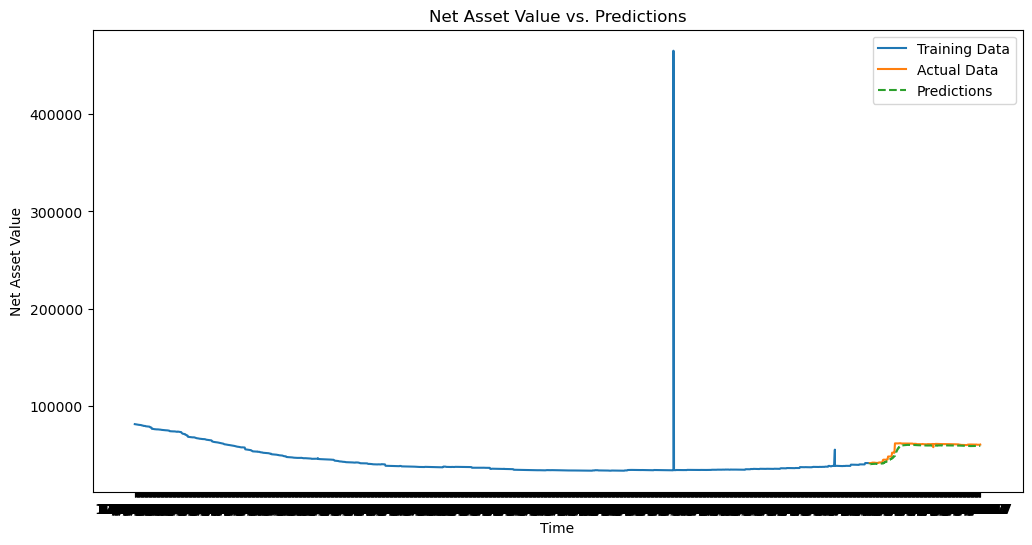

In [134]:
plt.figure(figsize=(12, 6))
plt.title('Net Asset Value vs. Predictions')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')
plt.plot(train['Net Asset Value'], label='Training Data')
plt.plot(valid['Net Asset Value'], label='Actual Data')
plt.plot(valid['Predictions'], label='Predictions', linestyle='--')
plt.legend()
plt.show()

In [135]:
train

,Net Asset Value
Date Valued,
12/30/2022,81601.029013
12/29/2022,81488.881027
12/28/2022,81435.834250
12/27/2022,81231.335961
12/23/2022,81136.101780
...,...
10/20/2017,41618.910461
10/19/2017,41615.333160
10/19/2017,41615.333160


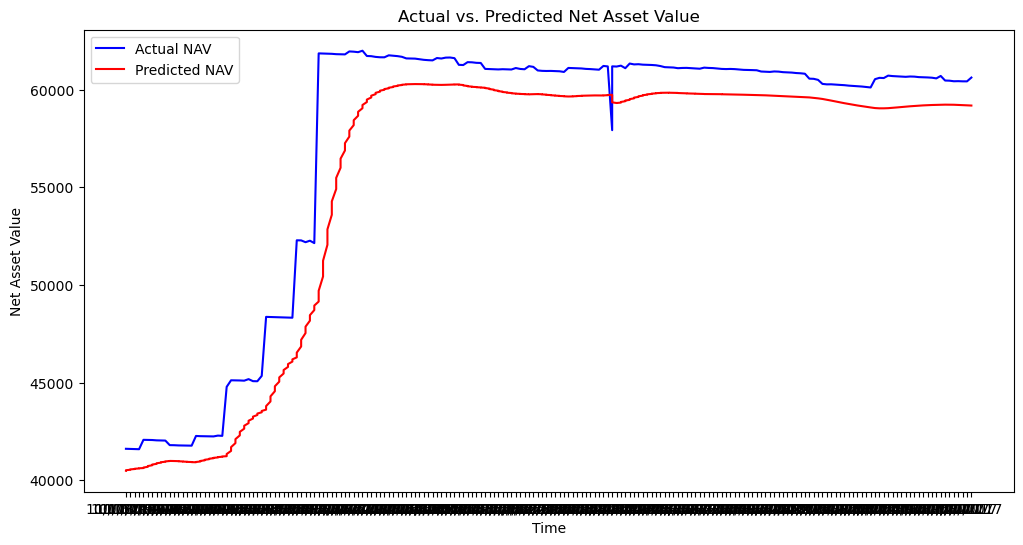

In [136]:
import matplotlib.pyplot as plt

# Assuming 'valid' is a DataFrame containing 'Net Asset Value' and 'Predictions' columns
plt.figure(figsize=(12, 6))
plt.title('Actual vs. Predicted Net Asset Value')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')

# Plot the actual 'Net Asset Value' in blue
plt.plot(valid['Net Asset Value'], label='Actual NAV', color='blue')

# Plot the 'Predictions' in red
plt.plot(valid['Predictions'], label='Predicted NAV', color='red')

plt.legend()
plt.show()


In [137]:
valid

,Net Asset Value,Predictions
Date Valued,,
10/17/2017,41607.788934,40484.585938
10/17/2017,41607.788934,40510.609375
10/16/2017,41601.779229,40533.605469
10/16/2017,41601.779229,40553.730469
10/13/2017,41590.355469,40571.437500
...,...,...
1/6/2017,60431.945037,59228.519531
1/5/2017,60437.270157,59220.042969
1/4/2017,60428.107028,59209.972656


In [138]:
from sklearn.ensemble import RandomForestRegressor
features = ['Outstanding Number of Units', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']
target = 'Net Asset Value'

X = data[features]
y = data[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X)


In [139]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions using the Random Forest model
rf_predictions = rf_model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, rf_predictions, squared=False)

# Calculate MSE
mse = mean_squared_error(y, rf_predictions)

# Calculate R-squared (R2)
r2 = r2_score(y, rf_predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 3454.0557475493983
Mean Squared Error (MSE): 11930501.107179033
R-squared (R2): 0.9552026994636901


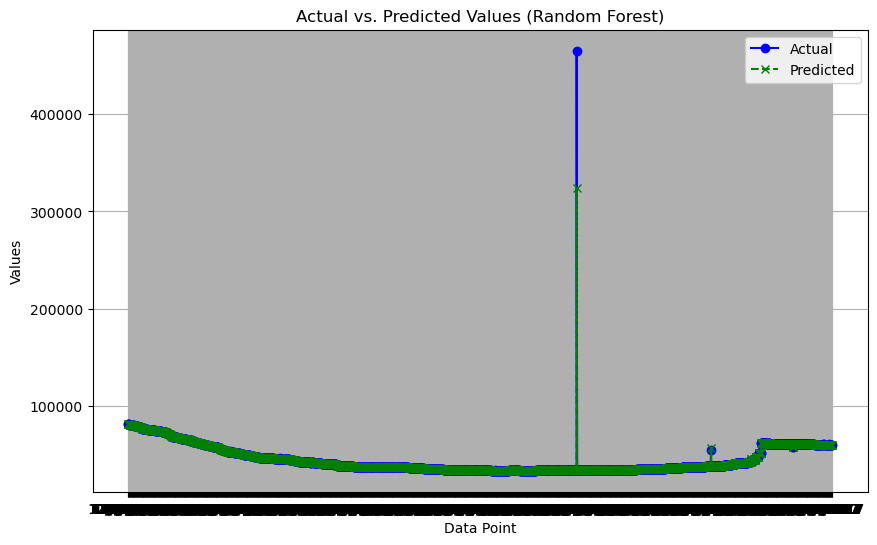

In [140]:

rf_predictions = rf_model.predict(X)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': rf_predictions})

# Plot actual and predicted values on the same axis
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x', linestyle='--', color='green')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()
